# This method uses U-Net model for creating masks from benign and malignant cancer ultrasound photos and segmentating them.

We start off by importing essential libraries etc.

In [1]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

Then, we want to create an image loader function for easier data load.

In [28]:
## defining a frame for image and mask storage

framObjTrain = {'img' : [],
           'mask' : []
          }

## defining data Loader function
def LoadData( frameObj = None, imgPath = None, maskPath = None, shape = 256):
    imgNames = os.listdir(imgPath)
    
    names = []
    maskNames = []
    unames = []
    
    for i in range(len(imgNames)):
        unames.append(imgNames[i].split(')')[0])
    
    unames = list(set(unames))
    
    for i in range(len(unames)):
        names.append(unames[i]+').png')
        maskNames.append(unames[i]+')_mask.png')
    
    imgAddr = imgPath + '/'
    maskAddr = maskPath + '/'
    
    for i in range (len(names)):
        img = plt.imread(imgAddr + names[i])
        mask = plt.imread(maskAddr + maskNames[i])
        
        img = cv2.resize(img, (shape, shape)) 
        mask = cv2.resize(mask, (shape, shape))
        
        frameObj['img'].append(img)
        frameObj['mask'].append(mask)
        
    return frameObj

Now, we haveto load benign and malignant cancer images from the dataset.

In [21]:
# loading benign samples
framObjTrain = LoadData( framObjTrain, imgPath = 'Dataset_BUSI_with_GT/benign'
                        , maskPath = 'Dataset_BUSI_with_GT/benign'
                         , shape = 256)

NameError: name 'cv2' is not defined

In [22]:
# loading malignant samples
framObjTrain = LoadData( framObjTrain, imgPath = 'Dataset_BUSI_with_GT/malignant'
                        , maskPath = 'Dataset_BUSI_with_GT/malignant'
                         , shape = 256)

NameError: name 'cv2' is not defined

Let's display one image and it's mask from the loaded data for a better overview.

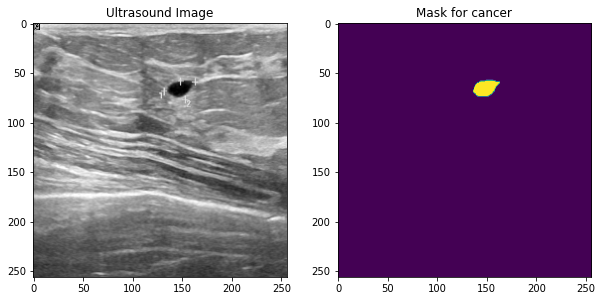

In [23]:
## displaying data loaded by our function
plt.figure(figsize = (10, 7))
plt.subplot(1,2,1)
plt.imshow(framObjTrain['img'][0])
plt.title('Ultrasound Image')
plt.subplot(1,2,2)
plt.imshow(framObjTrain['mask'][0])
plt.title('Mask for cancer')
plt.show()